# Challenge Data Scientist - Mauricio Abarca

The problem consists in predicting the probability of delay of the flights that land or take off from the airport of Santiago de Chile
(SCL). For that you will have a dataset using public and real data where each row corresponds to a flight that landed or took off
from SCL during 2017. The following information is available for each flight:
- **Fecha-I:** Scheduled date and time of the flight.
- **Vlo-I:** Scheduled flight number.
- **Ori-I:** Programmed origin city code.
- **Des-I:** Programmed destination city code.
- **Emp-I:** Scheduled flight airline code.
- **Fecha-O** Date and time of flight operation.
- **Vlo-O:** Flight operation number of the flight.
- **Ori-O:** Operation origin city code.
- **Des-O:** Operation destination city code.
- **Emp-O:** Airline code of the operated flight.
- **DIA:** Day of the month of flight operation.
- **MES:** Number of the month of operation of flight.
- **AÑO:** Year of flight operation.
- **DIANOM:** Day of the week of flight operation.
- **TIPOVUELO:** Type of flight, I = Internatiol, N = National.
- **OPERA:** Name of the airline that operates.
- **SIGLAORI:** Name city of origin.
- **SIGLADES:** Destination city name. 


## Challenges
1) How is the data distributed? Did you find any noteworthy insight to share? What can you conclude about this?
   > *[See Solution](##-Challenge-1)*
   
2) Generate the following additional columns. Please export them to a CSV file named synthetic_features.csv:
   - **high_season** : 1 if Date-I is between Dec-15 and Mar-3, or Jul-15 and Jul-31, or Sep-11 and Sep-30, 0 otherwise. 
   - **min_diff** : difference in minutes between Date-O and Date-I. 
   - **delay_15** : 1 if min_diff > 15, 0 if not. 
   - **period_day** : morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59) and night (between 19:00 and 4:59), based onDate-I.
  
   > *[See Solution](##-Challenge-2)*
     
  
3) What is the behavior of the delay rate across destination, airline, month of the year, day of the week, season, type of flight?What variables would you expect to have the most influence in predicting delays?
   > *[See Solution](##-Challenge-3)*
   
4) Train one or several models (using the algorithm(s) of your choice) to estimate the likelihood of a flight delay. Feel free to generate additional variables and/or supplement with external variables.
   > *[See Solution](##-Challenge-4)*
   
5) Evaluate model performance in the predictive task across each model that you trained. Define and justify what metrics you used to assess model performance. Pick the best trained model and evaluate the following:
   - What variables were the most influential in the prediction task? 
   - How could you improve the Performance?
   > *[See Solution](##-Challenge-5)*


## Virtual Environment

Before anything, we need to ensure that we have the proper virtual environment ready to work. Since the scope of the challenge is not how to properly use venv on your machine, I will skip theese and assume that the venv you'll use is created and ready to be use (in other words, activated). In my personal case, the venv is called latamds (and will be referred with that name later on). To see how to create the venv and give it a name, refer to the [venv docs](https://docs.python.org/3/library/venv.html).

Once latamds is created and activated, we need to ensure that the notebook is using it. In vscode this is simple as check the right corner for the kernel named (in my case) *''latamds(Python 3.11.2)*. 

At this point you should have the latamds venv created, activated, and used as kernel on this Notebook. Now import all the modules present on requirements.txt. After that you are ready to work with this Notebook.

## Data Exploration and Module Import

First let's import all the modules we'll be using later on, and load the given dataset (called dataset_SCL.csv). 

In [1]:
## Base Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

print('Base libraries loaded!')

base_df = pd.read_csv('data/dataset_SCL.csv')
print('Dataset Loaded!')

Base libraries loaded!
Dataset Loaded!


C:\Users\ShadowNightmare\AppData\Local\Temp\ipykernel_14632\2474636717.py:12: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  base_df = pd.read_csv('data/dataset_SCL.csv')


Now let's print the first five rows and the last five, from the dataset, and after that let's print the information about it.

In [2]:
base_df.head() # we can see delayed flights

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [3]:
base_df.tail() # we can see some format changes on Vlo-O

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68205,2017-12-31 14:55:00,400,SCEL,SPJC,JAT,2017-12-31 15:04:00,400.0,SCEL,SPJC,JAT,31,12,2017,Domingo,I,JetSmart SPA,Santiago,Lima


In [4]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


You can notice that apart from **DIA**, **MES** and **AÑO**, all the fields on the data are objects (strings). That being said, before seeing the distribution of the data, let's transform **Fecha-I** and **Fecha-O** to datetime. All the other fields will be seing as categorical values and will be properly managed later on.

In [5]:
base_df['Fecha-I'] = pd.to_datetime(base_df['Fecha-I'])
base_df['Fecha-O'] = pd.to_datetime(base_df['Fecha-O'])
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

The conversion worked great. Now let's take a closer look to the Vlo-O field.

In [6]:
print(base_df['Vlo-O'].info()) 
print('\nDF Shape: {}'.format(base_df.shape))

<class 'pandas.core.series.Series'>
RangeIndex: 68206 entries, 0 to 68205
Series name: Vlo-O
Non-Null Count  Dtype 
--------------  ----- 
68205 non-null  object
dtypes: object(1)
memory usage: 533.0+ KB
None

DF Shape: (68206, 18)


You can notice that Vlo-O has **only ONE** null value. So let's see this affected row

In [7]:
# Let's check the row with the missing value
base_df[base_df.isna().any(axis=1)]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


From the first and last five samples, we could think there's a correlation between Vlo-I and Vlo-O. In addition, if we take in consideration the data dictionary (the definitions stated at the beginning of this notebook and in the instructions pdf ), we can see that theese values should be similar (if not equals) in most of the cases. Taking that in consideration, let's use that Vlo-I value, to replace the Vlo-O's missing one.

In [8]:
# Let's use fillna to solve this problem
base_df['Vlo-O'] = base_df['Vlo-O'].fillna(base_df['Vlo-I'])

# Let's print the nan sum of all the dataset
print(base_df.isna().sum())

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        0
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64


It seems there isn't any more NaN vallues. Let's print the same row again, just for double check.

In [9]:
base_df.loc[(base_df['Fecha-I'] == '2017-01-19 11:00:00') & (base_df['Fecha-O'] == '2017-01-19 11:03:00')]
# used this way to keep the same output format  a simple .loc[index] should have the work done

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,200,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


You can notice Vlo-O and Vlo-I are the same, so everything is fine. Now let's check the format of the same two fields. If you recall the output from the head() and tail() pandas functions, you could have noted that there was some format change, so now let's see if that statement is right.

In [10]:
# Checking if the field Vlo-I is just a numeric string or has some letters in it
vlo_i = base_df[base_df['Vlo-I'].astype(str).str.contains('[a-zA-Z]', na=False)]
print(vlo_i)
print('\nTOTAL MATCHING ROWS (Vlo-I Letters): {}\n'.format(vlo_i.shape[0]))

tolerance = [0, 0, 0]
for val in base_df['Vlo-I'].tolist():
    if type(val) == str and tolerance[0] == 0: # this is to get the first value that matches, could be changed
        print('Value: {} - Type: {}'.format(val, type(val)))
        tolerance[0] += 1

    elif type(val) == int and tolerance[1] == 0:
        print('Value: {} - Type: {}'.format(val, type(val)))
        tolerance[1] += 1
    
    elif type(val) == float and tolerance[2] == 0:
        print('Value: {} - Type: {}'.format(val, type(val)))
        tolerance[2] += 1

   

# Let's check if has decimals too
vlo_i_d = base_df[base_df['Vlo-I'].astype(str).str.contains('\.[0-9]', na=False)]
print()
print(vlo_i_d)
print('\nTOTAL MATCHING ROWS (Vlo-I Decimals): {}\n'.format(vlo_i_d.shape[0]))


                  Fecha-I  Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O  \
22232 2017-05-13 21:50:00   989P  SCEL  SUMU   AAL 2017-05-13 21:52:00   989   
27464 2017-06-16 20:30:00   940P  SCEL  KDFW   AAL 2017-06-16 20:50:00   940   
39225 2017-08-07 19:00:00   591P  SCEL  LFPG   PUE 2017-08-07 20:35:00  591P   
39266 2017-08-24 23:00:00   846A  SCEL  KIAH   UAL 2017-08-24 23:00:00  2804   
58126 2017-11-05 17:00:00  1104A  SCEL  SCSE   SKU 2017-11-05 17:42:00  1104   

      Ori-O Des-O Emp-O  DIA  MES   AÑO   DIANOM TIPOVUELO  \
22232  SCEL  SUMU   AAL   13    5  2017   Sabado         I   
27464  SCEL  KDFW   AAL   16    6  2017  Viernes         I   
39225  SCEL  LFPG   PUE    7    8  2017    Lunes         I   
39266  SCEL  KIAH   UAL   24    8  2017   Jueves         I   
58126  SCEL  SCSE   SKU    5   11  2017  Domingo         N   

                          OPERA  SIGLAORI    SIGLADES  
22232         American Airlines  Santiago  Montevideo  
27464         American Airlines  S

In [11]:
# Checking if the field Vlo-O is just a numeric string or has some letters in it
vlo_o = base_df[base_df['Vlo-O'].astype(str).str.contains('[a-zA-Z]', na=False)]
print(vlo_o)
print('\nTOTAL MATCHING ROWS (Vlo-O Letters): {}\n'.format(vlo_o.shape[0]))

                  Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O  \
13906 2017-03-30 10:30:00    71  SCEL  SCIE   SKU 2017-03-30 10:50:00   71R   
13907 2017-03-22 11:00:00  1071  SCEL  SCIE   SKU 2017-03-22 11:00:00   71R   
17055 2017-03-22 10:00:00   201  SCEL  SCIE   LXP 2017-03-22 11:50:00  201R   
19207 2017-04-25 09:00:00    71  SCEL  SCIE   SKU 2017-04-25 09:29:00   71R   
22167 2017-04-06 21:10:00    43  SCEL  SCIE   LAW 2017-04-06 21:24:00   43R   
22301 2017-05-26 09:40:00   401  SCEL  LFPG   AFR 2017-05-26 10:03:00  401A   
22302 2017-05-28 09:40:00   401  SCEL  LFPG   AFR 2017-05-28 09:43:00  401B   
24304 2017-05-11 10:00:00   802  SCEL  SPJC   SKU 2017-05-11 10:36:00  802R   
27246 2017-05-15 12:15:00   114  SCEL  SCAT   LAN 2017-05-15 13:10:00  114R   
27247 2017-05-25 13:15:00   622  SCEL  MMMX   LAN 2017-05-25 13:23:00  622R   
32196 2017-06-29 12:40:00   492  SCEL  SACO   LAN 2017-06-29 12:27:00  492R   
38150 2017-07-10 23:30:00   338  SCEL  SCFA   LXP 20

In [12]:
# Let's seek decimals
vlo_o_d = base_df[base_df['Vlo-O'].astype(str).str.contains('\.[0-9]', na=False)]
print(vlo_o_d)
print('\nTOTAL MATCHING ROWS (Vlo-O Decimals): {}\n'.format(vlo_o_d.shape[0]))

                  Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O  Vlo-O  \
63806 2017-12-15 11:00:00   150  SCEL  SCFA   SKU 2017-12-15 11:19:00  150.0   
63807 2017-12-16 11:20:00   150  SCEL  SCFA   SKU 2017-12-16 11:34:00  150.0   
63808 2017-12-17 11:00:00   150  SCEL  SCFA   SKU 2017-12-17 11:35:00  150.0   
63809 2017-12-18 11:00:00   150  SCEL  SCFA   SKU 2017-12-18 11:21:00  150.0   
63810 2017-12-19 11:00:00   150  SCEL  SCFA   SKU 2017-12-19 11:19:00  150.0   
...                   ...   ...   ...   ...   ...                 ...    ...   
68201 2017-12-22 14:55:00   400  SCEL  SPJC   JAT 2017-12-22 15:41:00  400.0   
68202 2017-12-25 14:55:00   400  SCEL  SPJC   JAT 2017-12-25 15:11:00  400.0   
68203 2017-12-27 14:55:00   400  SCEL  SPJC   JAT 2017-12-27 15:35:00  400.0   
68204 2017-12-29 14:55:00   400  SCEL  SPJC   JAT 2017-12-29 15:08:00  400.0   
68205 2017-12-31 14:55:00   400  SCEL  SPJC   JAT 2017-12-31 15:04:00  400.0   

      Ori-O Des-O Emp-O  DIA  MES   AÑO

In [13]:
tolerance = [0, 0, 0]
for val in base_df['Vlo-O'].tolist():
    if type(val) == str and tolerance[0] == 0: # this is to get the first value that matches, could be changed
        print('Value: {} - Type: {}'.format(val, type(val)))
        tolerance[0] += 1

    elif type(val) == int and tolerance[1] == 0:
        print('Value: {} - Type: {}'.format(val, type(val)))
        tolerance[1] += 1
        
    elif type(val) == float and tolerance[2] == 0:
        print('Value: {} - Type: {}'.format(val, type(val)))
        tolerance[2] += 1

Value: 226 - Type: <class 'str'>
Value: 265.0 - Type: <class 'float'>


As you can see, there are 5 rows containing letters and 0 containing decimals on the column Vlo-I. But there are 16 rows containing letters, and the 4400 containing decimals on Vlo-O. There's also some weird behaviour on Vlo-I, for some reason there are float values in a column that it's dtype object (so it should be string only). Now, let's solve first the problem of the dtype on Vlo-I.

In [14]:
base_df['Vlo-I'] = base_df['Vlo-I'].astype(str)

# Let's Check
tolerance = [0, 0]
for val in base_df['Vlo-I'].tolist():
    if type(val) == str and tolerance[0] == 0: # this is to get the first value that matches, could be changed
        print('Value: {} - Type: {}'.format(val, type(val)))
        tolerance[0] += 1

    elif type(val) == int and tolerance[1] == 0:
        print('Value: {} - Type: {}'.format(val, type(val)))
        tolerance[1] += 1

    elif type(val) == float and tolerance[2] == 0:
        print('Value: {} - Type: {}'.format(val, type(val)))
        tolerance[2] += 1

Value: 226 - Type: <class 'str'>


Now let's solve the problem of the decimals on Vlo-O.

In [15]:
# First let's create a list with the values to change
vlo_o_d = vlo_o_d['Vlo-O'].tolist()

# Create a list with those values converted to int to eliminate the decimal
vlo_o_int = [str(int(eval(str(i)))) for i in vlo_o_d]

custom_df = base_df.copy() # we'll work with a copy to not mess up the original df
custom_df.loc[custom_df['Vlo-O'].isin(vlo_o_d), 'Vlo-O'] = vlo_o_int # ensure it's formatted as str

# Let's test with a flight from vlo_o_d series we had above ()
custom_df[custom_df['Fecha-I'] == '2017-12-15 11:00:00']

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
63806,2017-12-15 11:00:00,150,SCEL,SCFA,SKU,2017-12-15 11:19:00,150,SCEL,SCFA,SKU,15,12,2017,Viernes,N,Sky Airline,Santiago,Antofagasta


As you can see, the decimal problem is solved. Now, under the assumption that Vlo-O and Vlo-I share information, we could see theese fields as a category. In order to prove that, let's see if theese fields have a set of unique values (with the size of that set being smaller than size of the dataset)

In [16]:
# List of Vlo-I unique values
unique_vloi = custom_df['Vlo-I'].unique().tolist()

# List of Vlo-O unique values
unique_vloo = custom_df['Vlo-O'].unique().tolist()

print('N°of Unique Vlo-I: {}\nTotal samples: {}'.format(len(unique_vloi), custom_df.shape[0]))
print('This represents {:.2f}% of the data'.format((len(unique_vloi) * 100) / custom_df.shape[0])) # how small it is
print('\nN°of Unique Vlo-O: {}\nTotal samples: {}'.format(len(unique_vloo), custom_df.shape[0]))
print('This represents {:.2f}% of the data'.format((len(unique_vloo) * 100) / custom_df.shape[0]))

N°of Unique Vlo-I: 584
Total samples: 68206
This represents 0.86% of the data

N°of Unique Vlo-O: 608
Total samples: 68206
This represents 0.89% of the data


Based on the output above, it's safely to assume that those fields can behave as a category. In addition, the sizes of both lists are a somewhat similar, so we can build the joint dictionary.

In [17]:
# First let's sort both list
sorted_vloi = sorted(unique_vloi, key=lambda x: int("".join([i for i in str(x) if i.isdigit()])))
sorted_vloo = sorted(unique_vloo, key=lambda x: int("".join([i for i in str(x) if i.isdigit()])))

# Check everything it's ok
print('Sorted Vlo-I')
print('First 10 elements:\n{}\nLast 10 elements:\n{}\n'.format(sorted_vloi[:10], sorted_vloi[-10:]))
print('Sorted Vlo-O')
print('First 10 elements:\n{}\nLast 10 elements:\n{}'.format(sorted_vloo[:10], sorted_vloo[-10:]))

Sorted Vlo-I
First 10 elements:
['1', '3', '4', '5', '6', '7', '8', '9', '10', '11']
Last 10 elements:
['9659', '9661', '9662', '9673', '9689', '9701', '9782', '9851', '9955', '9956']

Sorted Vlo-O
First 10 elements:
['1', '3', '4', '5', '6', '7', '8', '9', '10', '11']
Last 10 elements:
['9662', '9673', '9689', '9701', '9782', '9851', '9858', '9860', '9955', '9956']


Only on the first and last ten elements we see that there're values presents in both lists. But just to be sure, let's see what values are not in both lists.

In [18]:
# First let's see the sorted_vloo values
non_shared =  list()
for val in sorted_vloo: 
    if val not in sorted_vloi:
        non_shared.append(val)
print('Vlo-O')
print('Length of non_shared: {}\nNon Shared list: {}\n'.format(len(non_shared), non_shared))

# Now let's see the sorted_vloi values
non_shared =  list()
for val in sorted_vloi: # use sorted_vloo since it has more elements
    if val not in sorted_vloo:
        non_shared.append(val)
print('Vlo-I')
print('Length of non_shared: {}\nNon Shared list: {}'.format(len(non_shared), non_shared))


Vlo-O
Length of non_shared: 28
Non Shared list: ['43R', '71R', '114R', '201R', '207R', '338R', '401A', '401B', '492R', '502R', '622R', '802R', '922', '989', '1001', '1160', '1297', '1303', '1304', '1318', '1346', '1361', '2726', '2763', '2804', '5924', '9858', '9860']

Vlo-I
Length of non_shared: 4
Non Shared list: ['204', '940P', '989P', '1104A']


As you can notice, there were several values that were present on both fields. So it's safer to say that now we can build the categorical dictionary.

In [19]:
# Let's join both lists
unique_flightNumber = np.unique((sorted_vloi + sorted_vloo)).tolist()
print('Length of unique_flightNumber: {}'.format(len(unique_flightNumber)))

flightNumber = dict()
for fn in unique_flightNumber:
    flightNumber[fn] = unique_flightNumber.index(fn)

Length of unique_flightNumber: 612


With the dict ready, lets replace those values on the dataframe.

In [20]:
custom_df.replace({'Vlo-I': flightNumber, 'Vlo-O': flightNumber}, inplace=True)
custom_df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,230,SCEL,KMIA,AAL,2017-01-01 23:33:00,230,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,230,SCEL,KMIA,AAL,2017-01-02 23:39:00,230,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,230,SCEL,KMIA,AAL,2017-01-03 23:39:00,230,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,230,SCEL,KMIA,AAL,2017-01-04 23:33:00,230,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,230,SCEL,KMIA,AAL,2017-01-05 23:28:00,230,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


To be sure, that it worked, let's print the corresponding value on the dict of the first value on Vlo-I.

In [21]:
fv = base_df['Vlo-I'][0]
print('First Value from Vlo-I: {}\nCorresponding value from dict: {}'.format(fv, flightNumber[fv]))

First Value from Vlo-I: 226
Corresponding value from dict: 230


For safety reasons, let's save the dataframe.

In [22]:
custom_df.to_csv('data/pre_explored_dataset_SCL.csv', index=None)

Everything is correct. Let's solve the challenges now.

## Challenge 1

In order to see how the data is distributed, I'll be spliting the dataframe columns into two lists. But first let's drop all the origin columns, since we're only working with the SCL.

In [23]:
# Lets create a filter sublist 
filter = ['Ori-I', 'Ori-O', 'SIGLAORI']

In [24]:
custom_df.drop(filter, axis=1, inplace=True)
custom_df.head()

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLADES
0,2017-01-01 23:30:00,230,KMIA,AAL,2017-01-01 23:33:00,230,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Miami
1,2017-01-02 23:30:00,230,KMIA,AAL,2017-01-02 23:39:00,230,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Miami
2,2017-01-03 23:30:00,230,KMIA,AAL,2017-01-03 23:39:00,230,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Miami
3,2017-01-04 23:30:00,230,KMIA,AAL,2017-01-04 23:33:00,230,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Miami
4,2017-01-05 23:30:00,230,KMIA,AAL,2017-01-05 23:28:00,230,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Miami


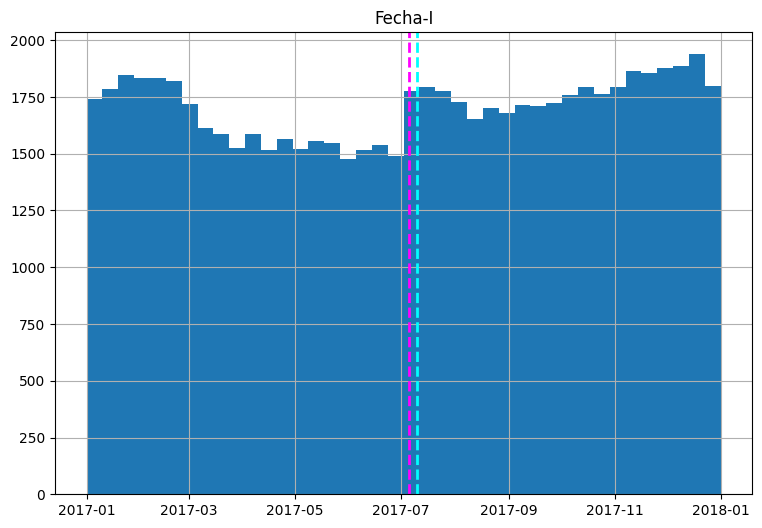

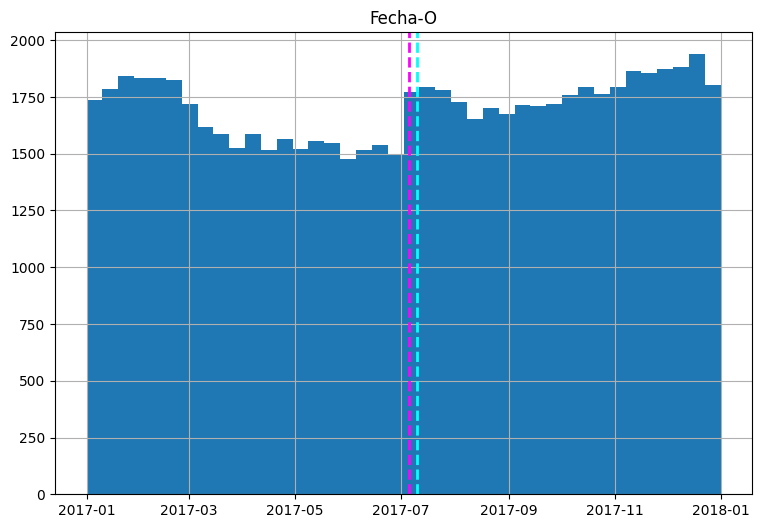

In [25]:
# Take the datetime features
filter = ['Fecha-I', 'Fecha-O']
datetime_features = custom_df[filter]

# Plot the date features
for col in datetime_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = custom_df[col]
    feature.hist(bins=40, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

# Plot

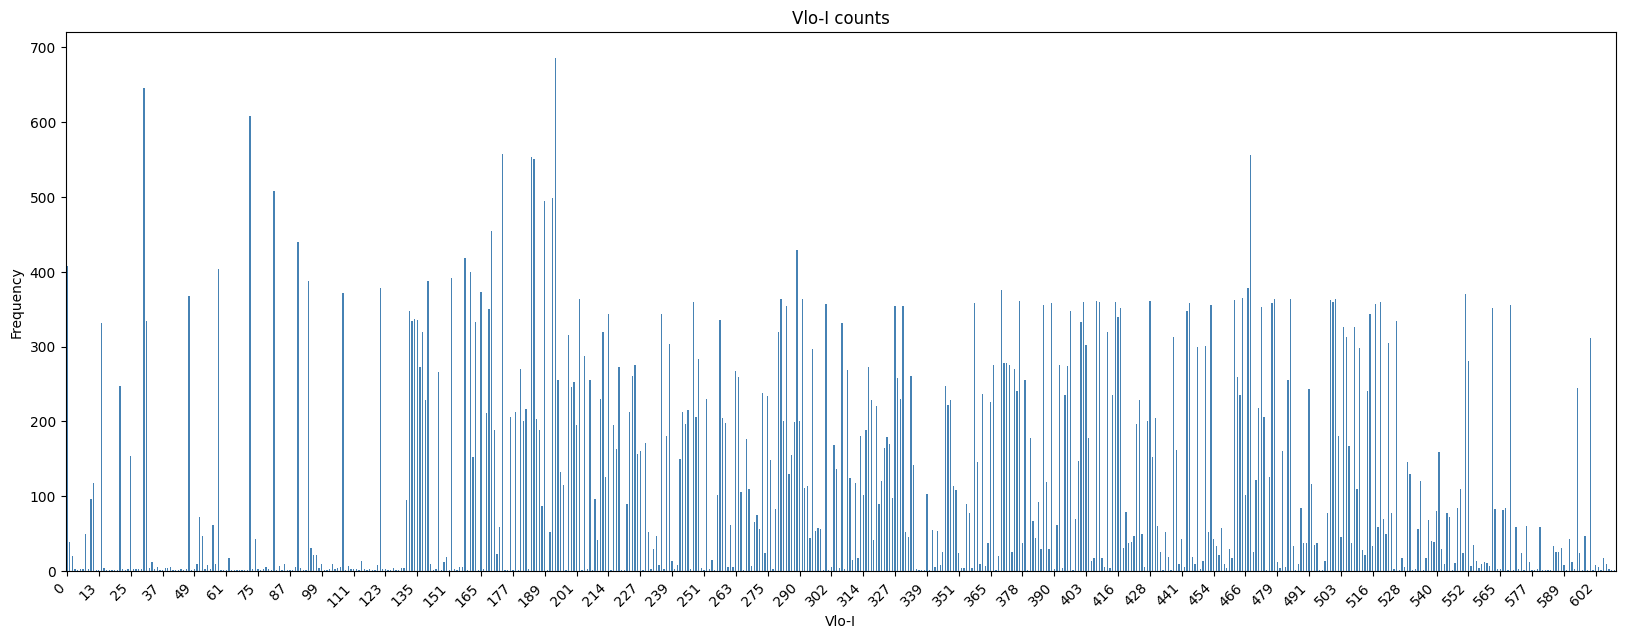

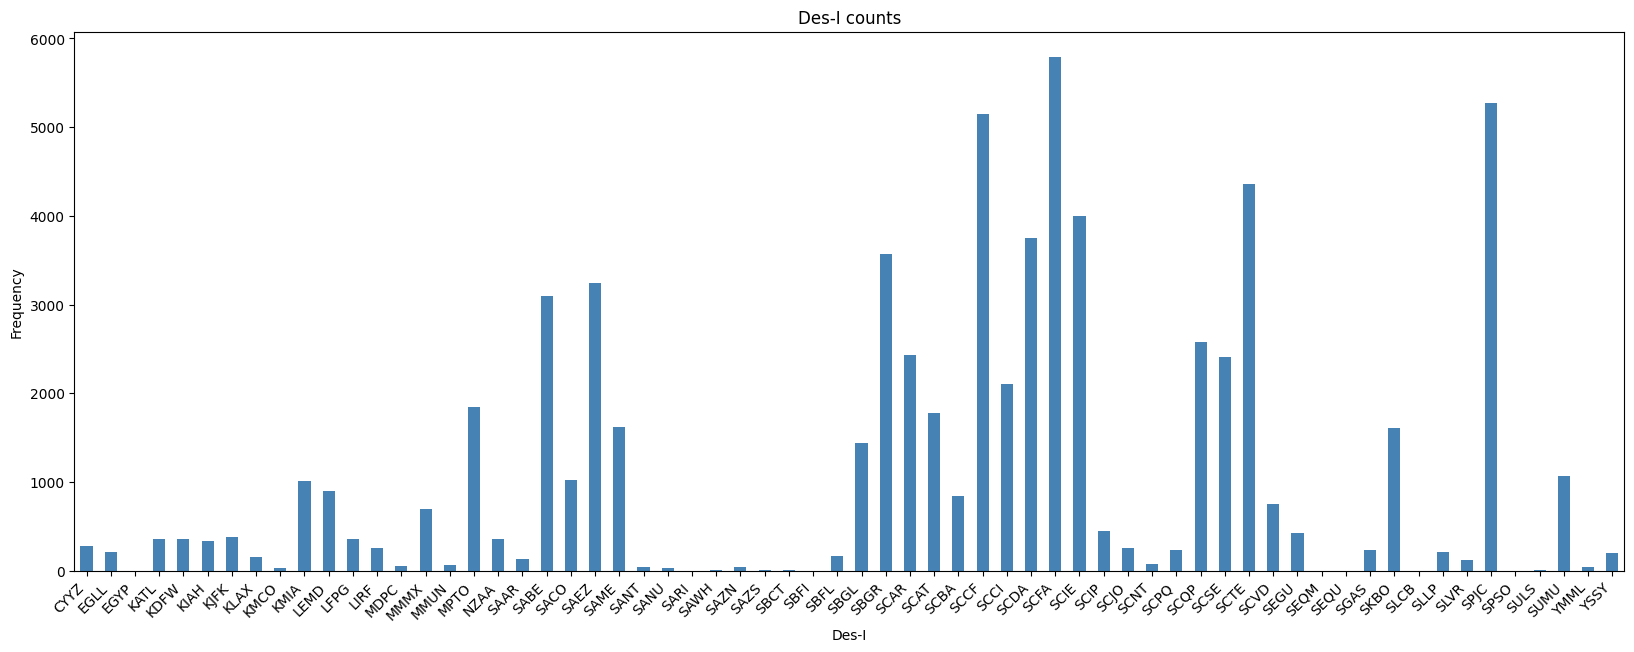

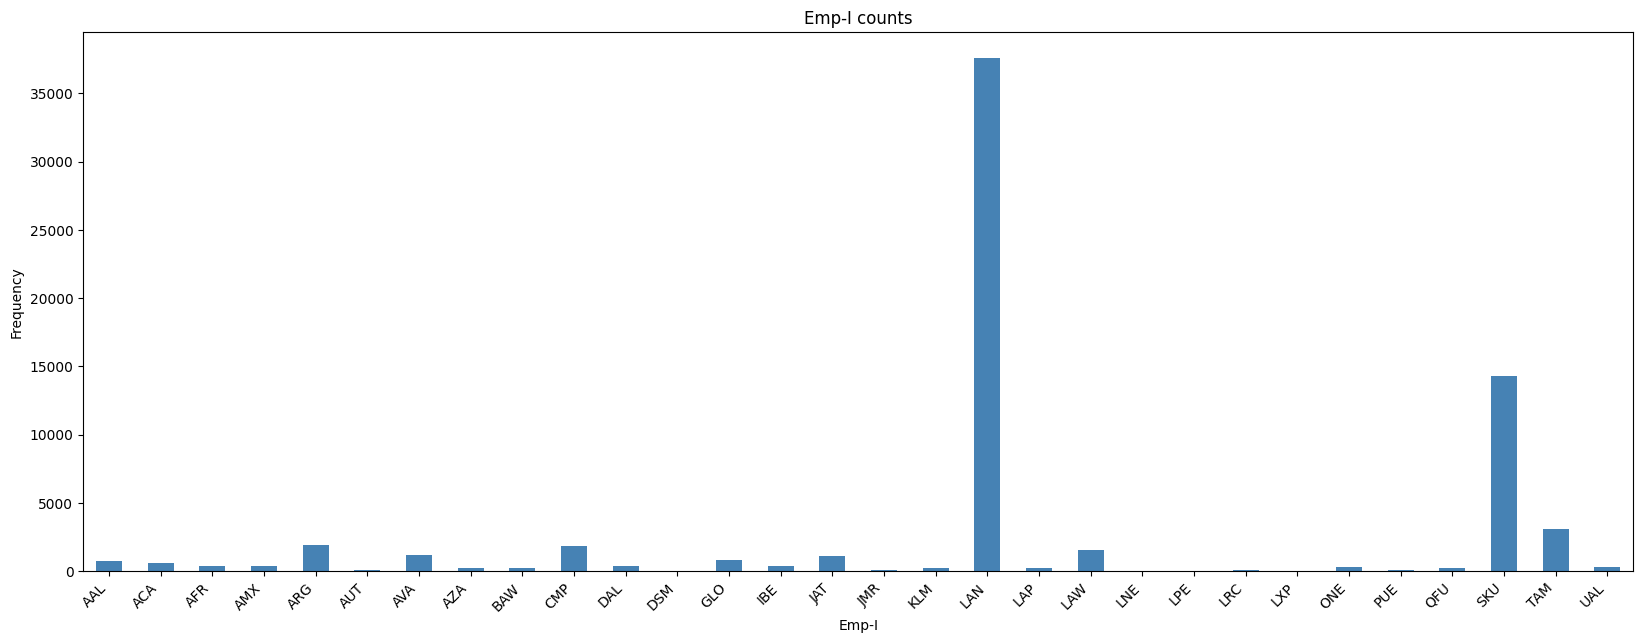

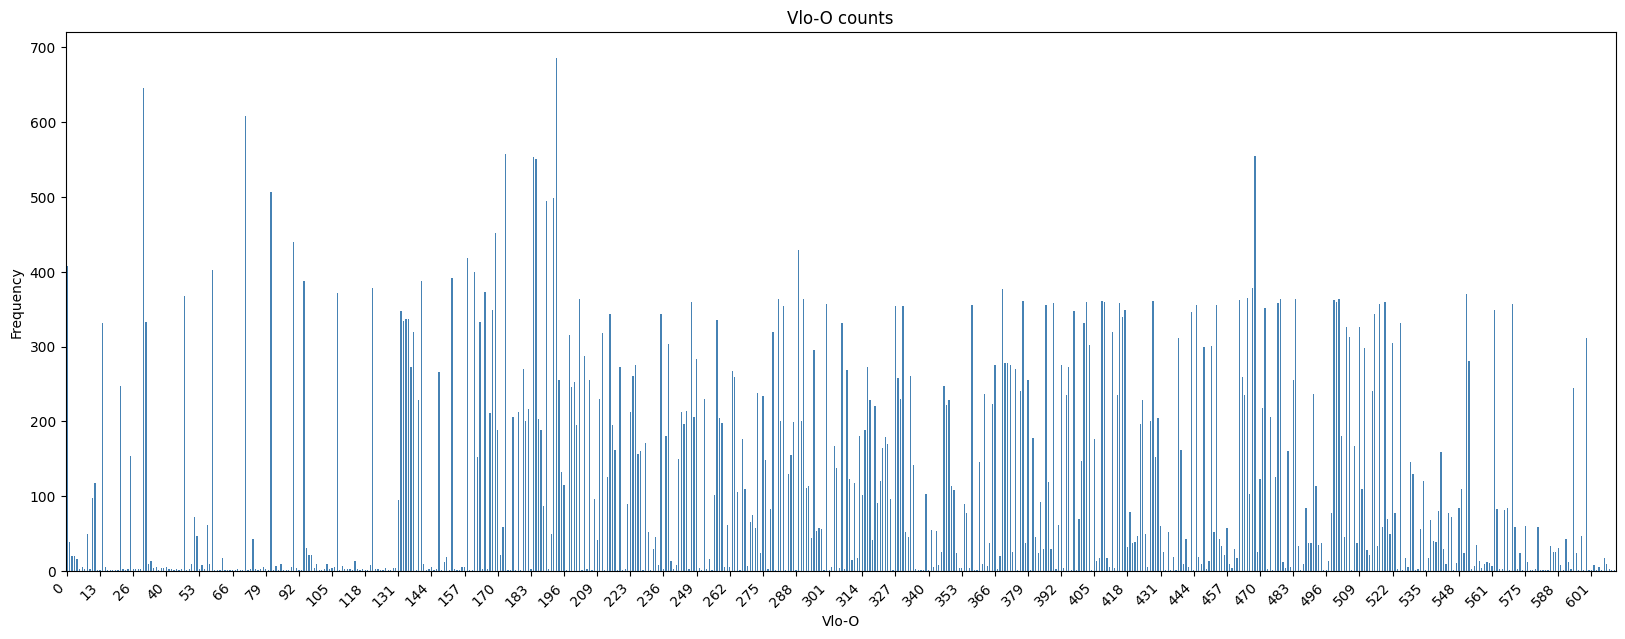

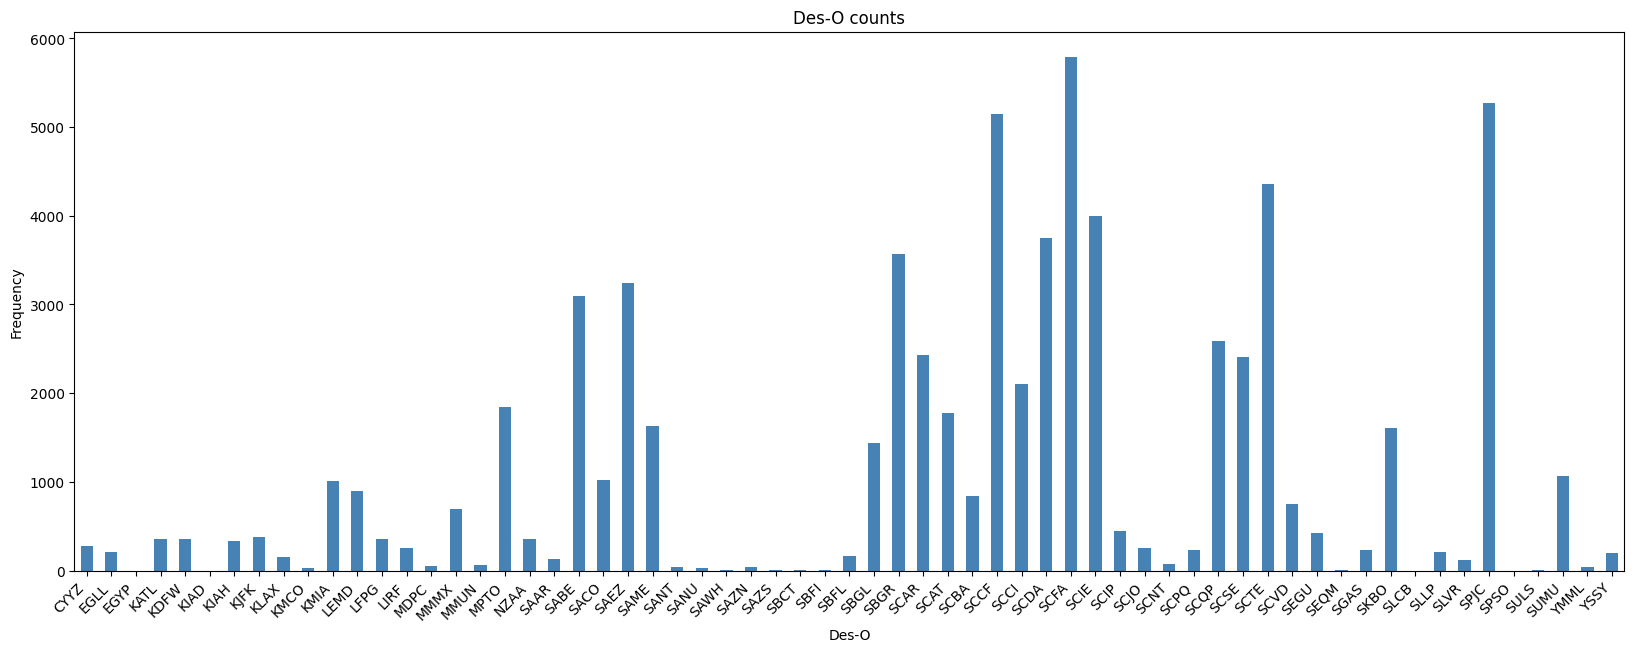

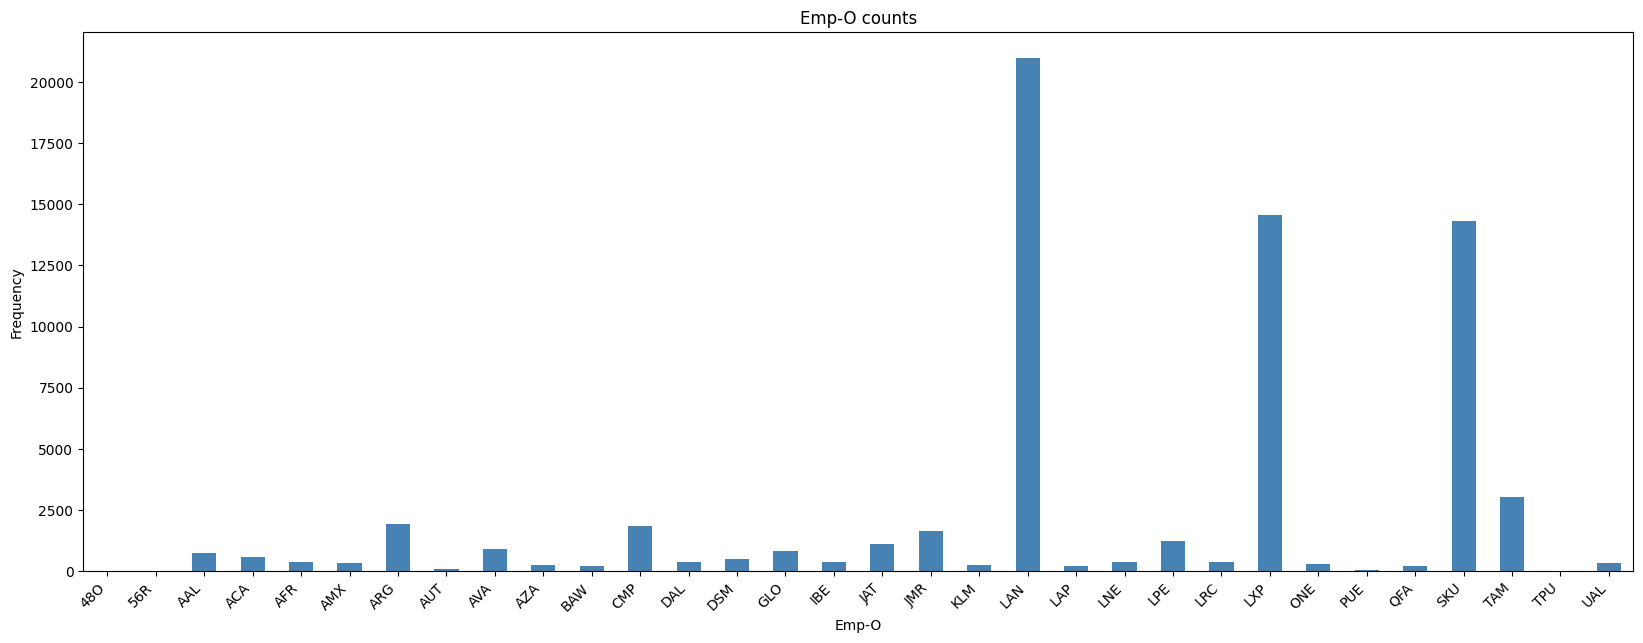

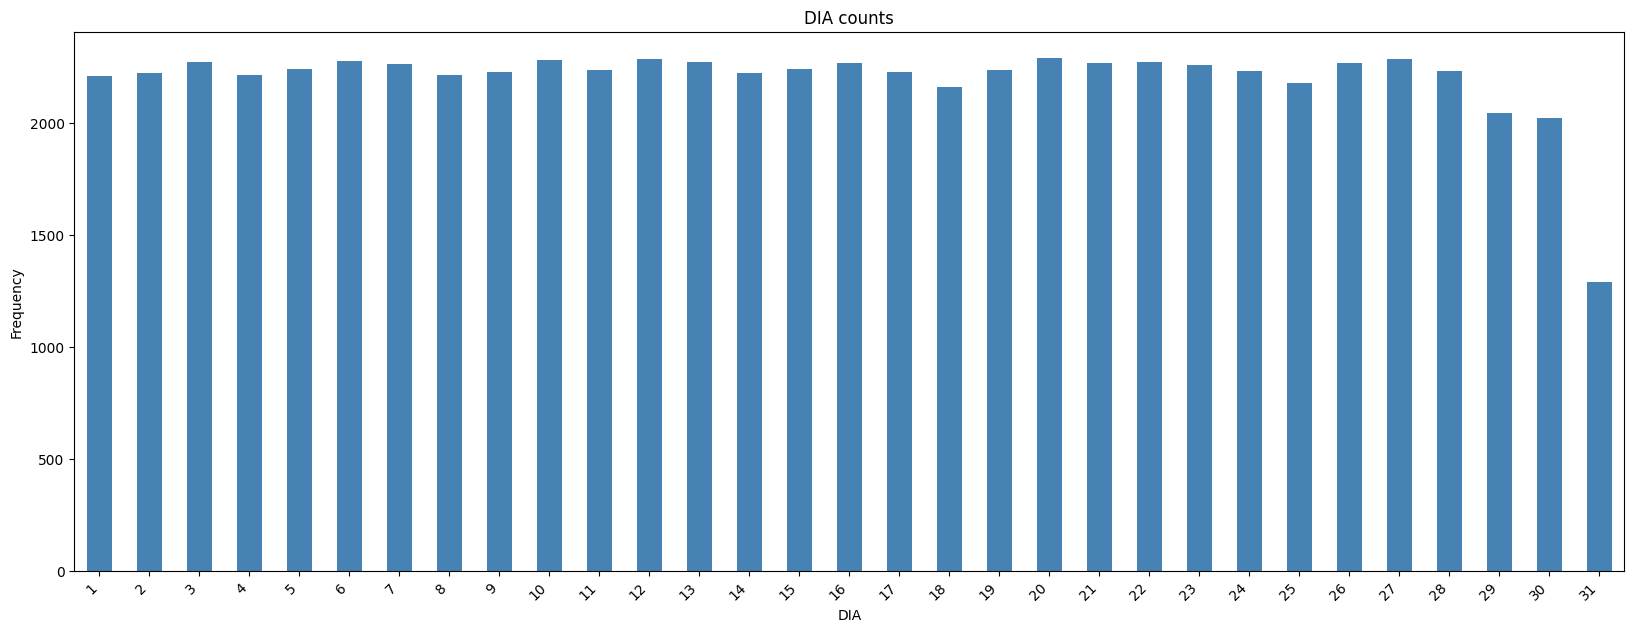

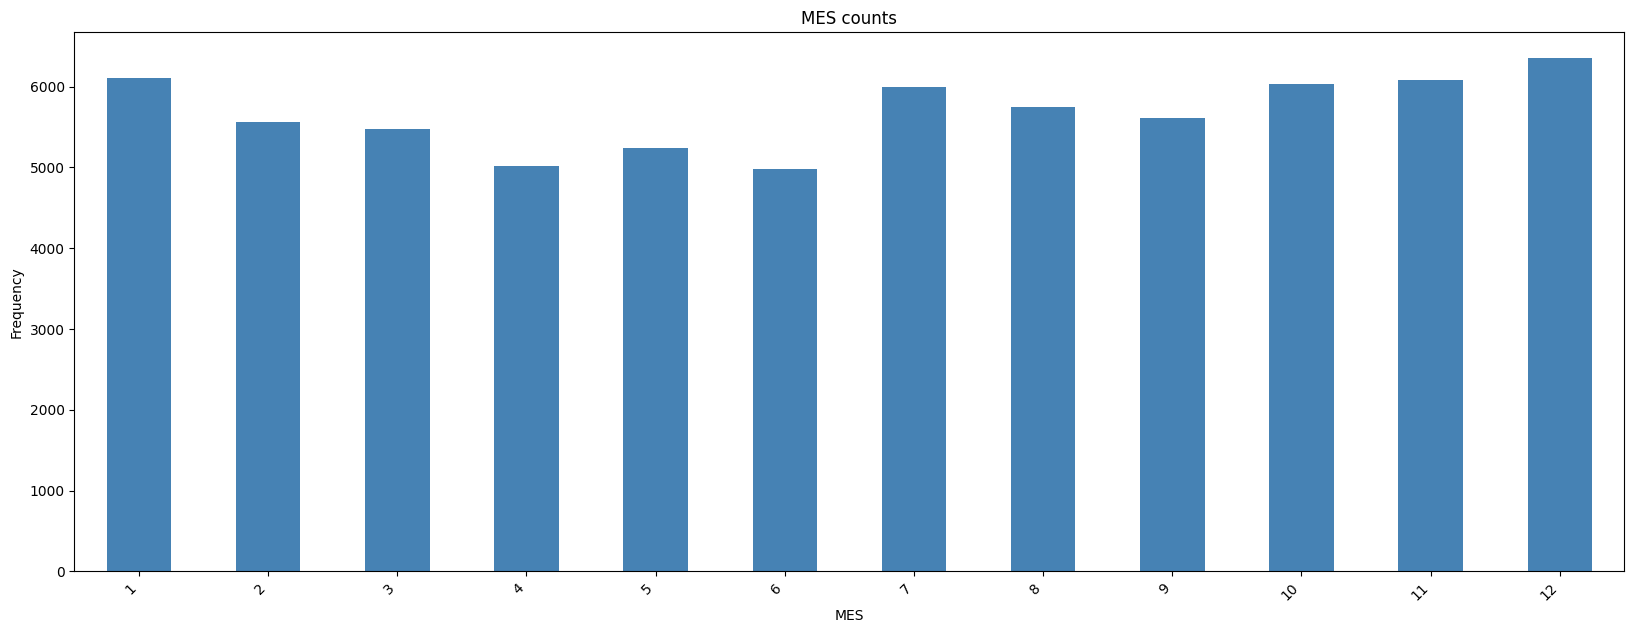

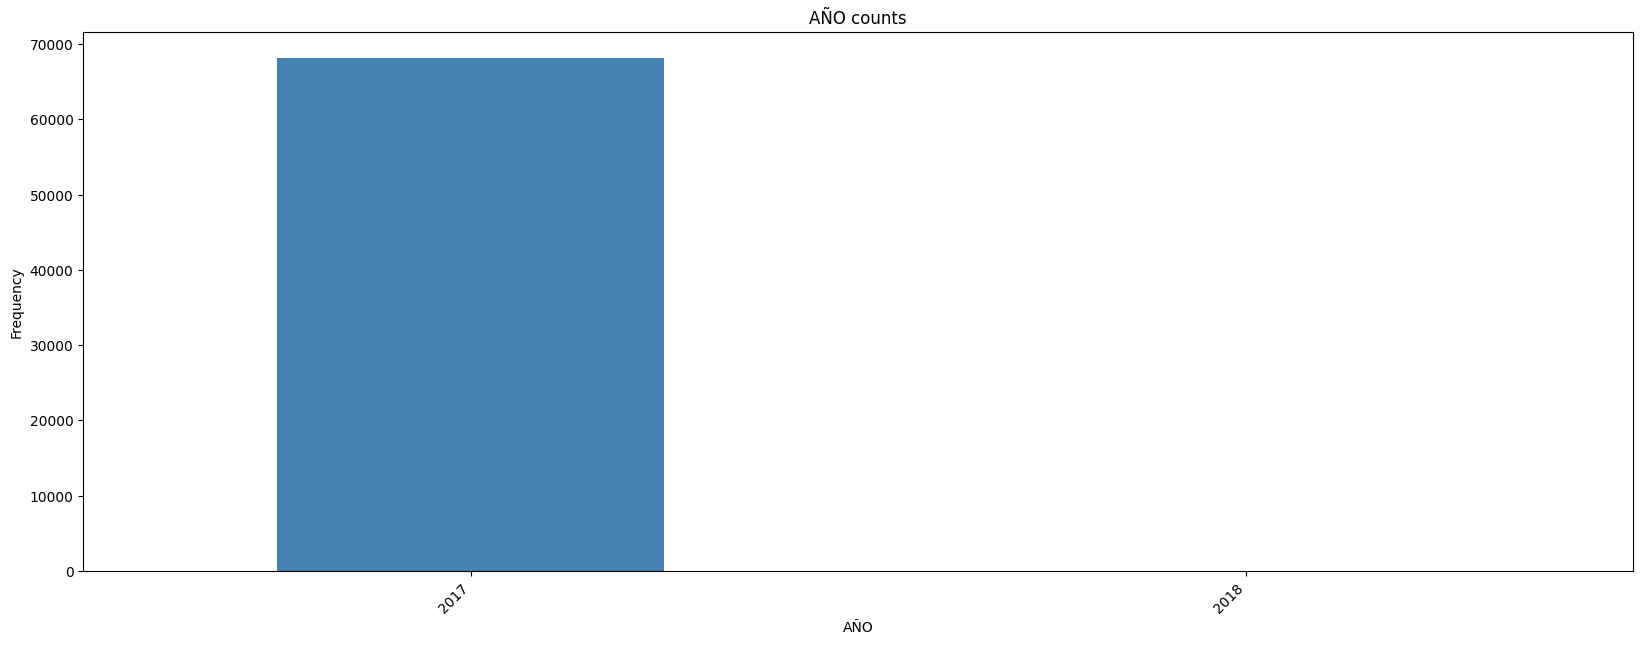

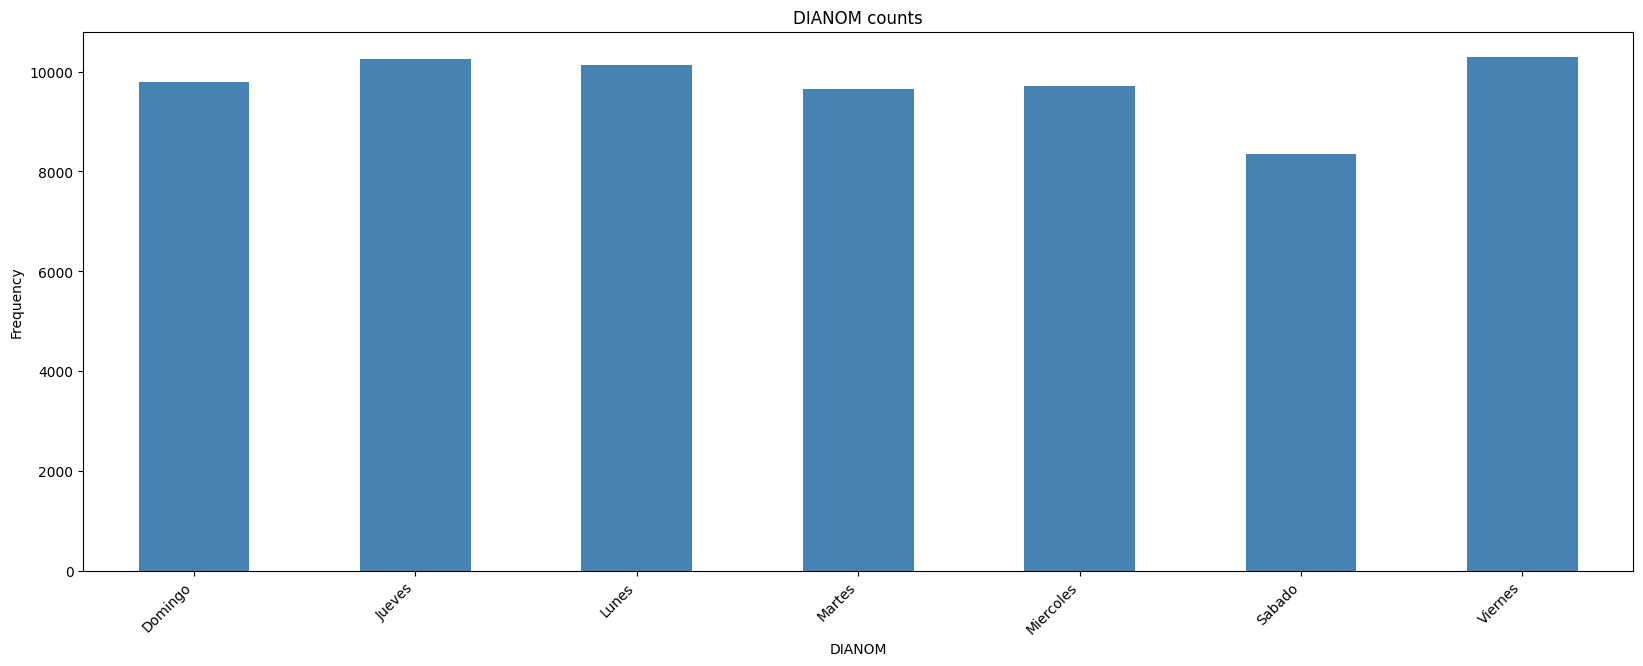

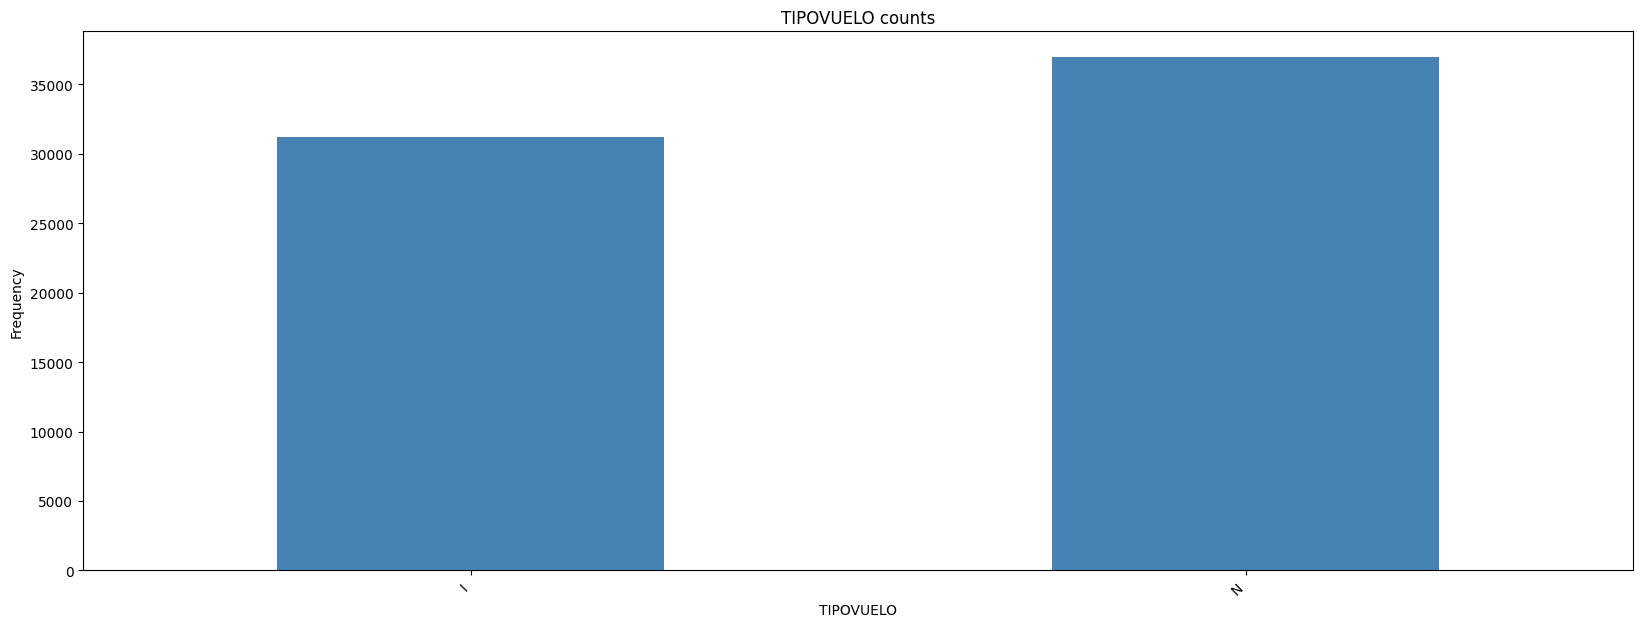

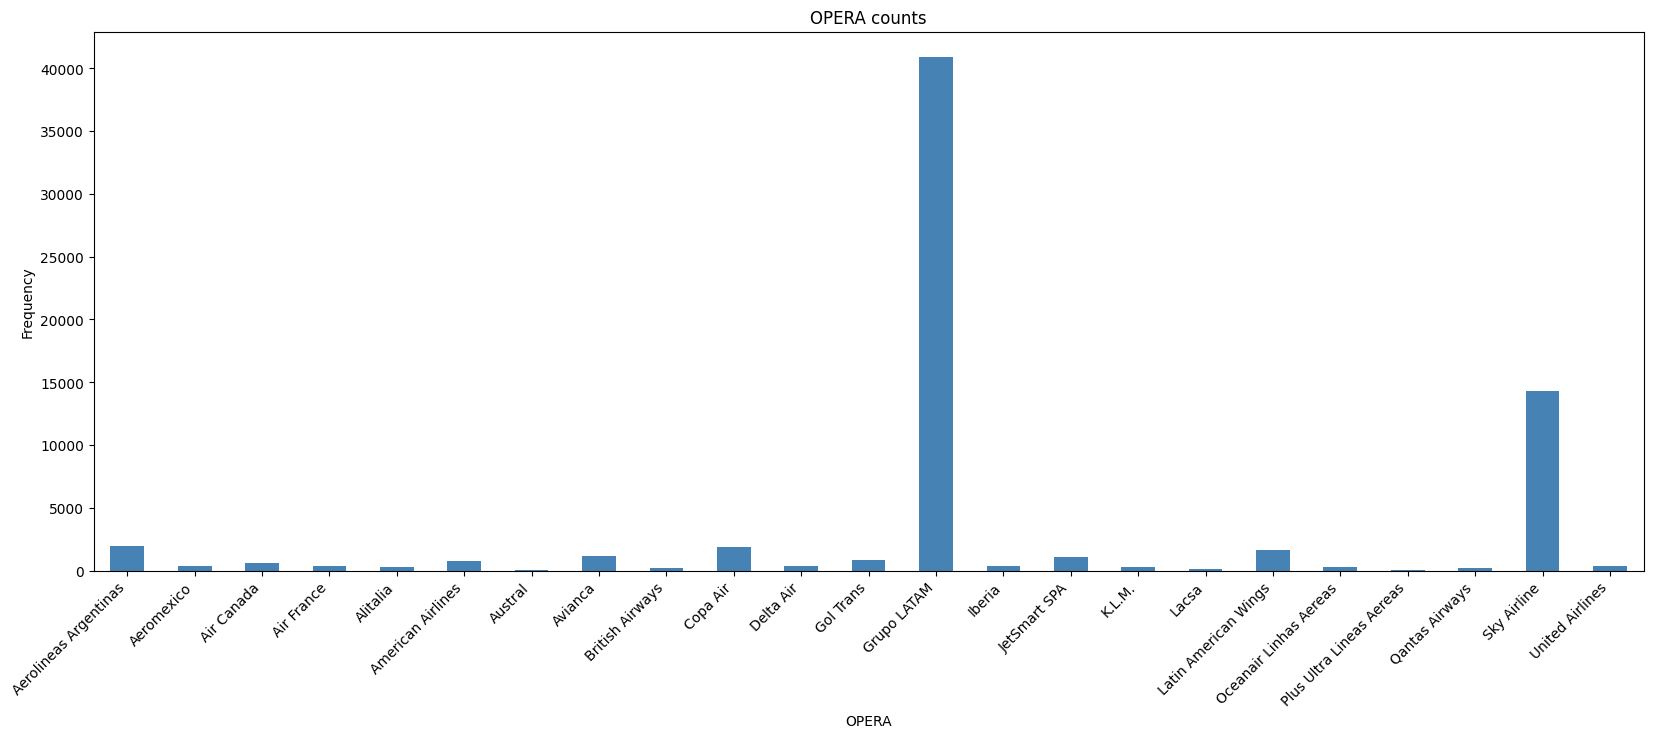

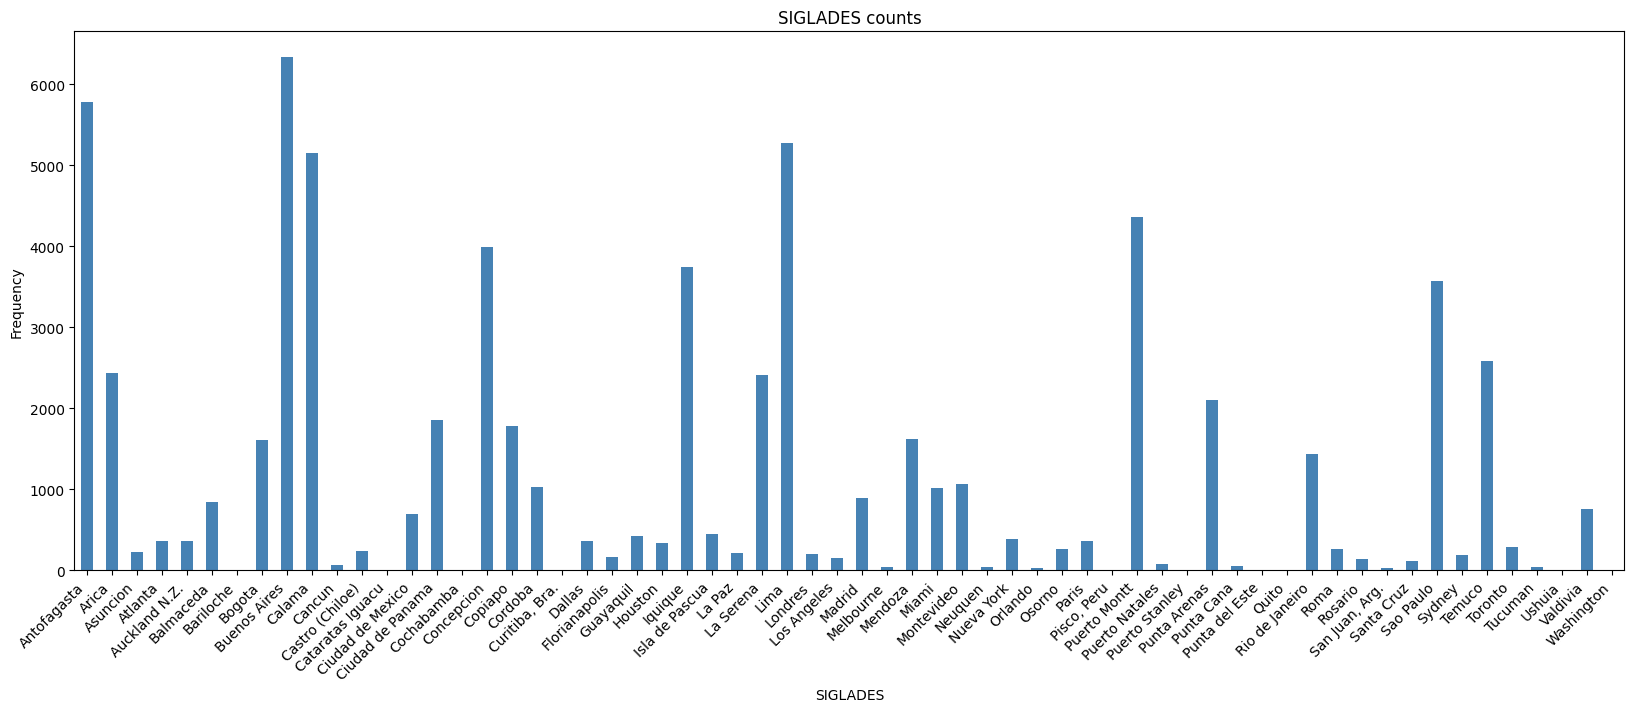

In [26]:
# Take the categorical features
categorical_features = custom_df.drop(['Fecha-I', 'Fecha-O'], axis=1)
problematics = ['Vlo-I', 'Vlo-O']

for plot_col in categorical_features:
    counts = custom_df[plot_col].value_counts().sort_index()
    fig = plt.figure(figsize=(20, 7))
    ax = fig.gca()
    counts.plot.bar(ax=ax, color='steelblue')
    ax.set_title(plot_col + ' counts')
    ax.set_xlabel(plot_col)
    ax.set_ylabel("Frequency")
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

    if plot_col in problematics:
        plt.locator_params(axis='x', nbins=50)

    

plt.show()

After seeing the charts, I have the following reflexions / insights to share:
   > Note: This section will be structured as follow, the bullet point represents the insight made based on the summary (that are the enumerated points)
1) First, based on the dates, the data seemed to be on a right-skewed distribution (at least the first seven months). Then abruptly goes up from the 1500 flight's mark to the 1750. From this point and until the end of the year the data followed a left-skewed distribution. With this we can affirm that the period between November 2017 and January 2018, was the period with most flight frequency. We even can find the mode in that period of time. 
   - An interesting insight will be trying to find the reason that triggered that suddenly change on the tendency of the data.
<br></br>
2) From both flight numbers features there isn't much to talk about, at least in detail because the plotting limitations. But it's safely to assume that there are at least four most common flight numbers (or operations / routes) that are scheduled or operated regularly, this will depend on which chart we are looking at. Another point to consider is that there are a several flights that operates on a similar and consistent frequency. And the last point we can get from those charts, is that from the value 135 until 577 (aproximately)  the flights starts to be more frequent.
   - An insight from these couple of charts it's to find those frequent flights, and get the information related to them. With that on mind we could have an interesting project there, involving discounts and advertisement.
<br></br>
3) There isn't much to talk about the destination's chart. We can notice that are at least four destinations over the 4000 flights. That coincides with was stated on the previous point. In addition to that, we have to consider that only a few destinations are over the 2000 flights, the vast majoriy are under this value or even lower, reaching values below one thousand.
   - We need to pay special attention to those flights over the three thousand threshold, because could be some really usefull data asociated.
<br></br>
4) From the airline code related charts, there's some really interesting information that can be collected. First of all, when people schedule their flights, they prefer LAN, and by far. On the 'Emp-I counts' chart we can see that the top-3 airlines are LAN, SKU and TAM (in that order); as stated before LAN is by far the most preferred. But, on the other hand, on the 'Emp-O counts' chart, we can notice that the maximum number of flights was reduced and that difference was distributed among the chart, but not evenly. The outcome of that, was that LAN it's now above 20000 flights by a small difference (something significant considering in 'Emp-I counts' was above the 35000 flights), the second top airline is LXP close to the 15000 flights, and in third place is SKU with a few flights less than LXP. The other airlines tend to maintain their numbers, but it's noticeable that someothers decreased his numbers, in order to 'new' airlines to show up (new airlines from the data perspective, as there are some that weren't on the scheduled chart).
   - From this charts there's one thing we need to pay special attention to, that being the fact that all the previous insight (and maybe the new ones), will be strictly attached to the fact presented on this point (LAN being the main airline operating on SCL). That could sound a bit obvious (a chilean airline dominating the flights number on a chilean airport), but this also marks a trend towards the fact that passengers that go through SCL made it for national flights on a major basis.
<br></br>
5) Now, from the 'DIA counts' chart there isn't much to discuss. It's noticeable that there's a uniform trend, almost everyday had more than 2000 flights, and the differences between days doesn't seem to be much significant. 
   - We have to take the fact that the days '31' have a lesser frequency of planes with a pinch of salt, because we must be aware that only seven months has 31 days, therefore lesser days to take flights.
<br></br>
6) The 'MES counts' chart is one really interesting to look at. In this chart we can see in a better way the distribution that was noted on the 'Fecha-I' and 'Fecha-O' charts. It's even clearer the increase of flights on the month of July, and the tendency to increase as the year passed by.
   - Based on this chart, and the airlines ones, we can assume, with some high degree of confidence, that the increase it's a response of the Winter Vacations, the Public / National Holidays and Festivities.
<br></br>
7) From 'AÑO counts' chart there's not much to say, other than the data was collected by a one year window from 2017 to 2018, and that almost no one flew on those dates.
   - The fact that 2018 doesn't had many flights could respond to the date where the dataset was built (in other words the date on which data collection stopped).
<br></br> 
8) Based on the 'DIANOM counts' chart, we could state that the least preferred day to flight is Saturday, it's the most notable day where the flight operations were lower. We have to note also that Thursdays and Fridays are some of the preferred days to flight, closely followed by Sundays and Mondays.
   - This fact needs to be taken with a pinch of salt, because could be a seasonal behaviour, based on the distribution of those days  on the calendar (Maybe that year more holidays on those days).
<br></br>
9) The 'FLIGHT TYPE counts' graph is fairly straightforward, it verifies a previously stated fact, the majority of flights that passed through SCL were Domestic flights. It also verifies that this corresponds to the fact that LAN had the vast majority of flight operations during the study year.
   - With the current data it would be interesting to ask ourselves if this behaviour is seasonal?, can be changed with the current features? Or Are there any other external factors that affect that decission? (factors we are not taking into account).
<br></br>
10) From the 'OPERA counts' it's noticeable the way of how the airlines from the scheduled flights got changed and how those flights got distributed among other airlines. This also explains why on the 'Emp-O' feature there are new airlines (they were part of the same company group / conglomerate). It also reafirms that LAN (also known as 'Grupo LATAM') has the majority of flights that make use of SCL airport.
   - There's nothing much left to say about that chart. It could be interesting see the relation between these company groups and the flights made (on a pie chart, to see the percentage of flights each group has, and try to find an explanation with the given data).
11)  'SIGLADES counts' reafirms several facts stated before. Like the preference of National flights, the few destinations over the 4000 flights and that a considerable majority has near 2000 flights or lower.
   - Could be interesting compare the common destinations of this year with the situation around the world, to see if there's any relation. Could be also interesting to study the reverse situation (from which airports and countries SCL recieves more air traffic).
  

In conclusion, the year 2017 was a year where most of the air traffic was made by 'Grupo LATAM'. A considerable portion of that traffic was only made inside Chile, so it's safe to assume that the National situation could have affected the data in someway. Now, taking into account the future flight delay prediction model, there isn't much to say about. All the presented features could be used for the prediction purpose, but to not generate a trend of the prediction towards LATAM's flights, I'll be excluding the features 'Emp-I', 'Emp-O' and 'OPERA'. I'm aware that the airlines could have an impact on the flights delay, but with the given data, this delay will relay on LATAM most of the time, and for now I want to try that the data itsn't biased a lot.

## Challenge 2

## Challenge 3

## Challenge 4

## Challenge 5